In [1]:
import pandas as pd
import os
from datetime import datetime, timedelta
from tqdm import tqdm
import gc
import sys
import matplotlib.pyplot as plt
import MetaTrader5 as mt5

path_root = "D:/Documentos/Erik/TDR/TDR-Forex"
sys.path.append(path_root)
from utils.mt5 import init_mt5
from utils.data import get_dataset
from utils.strategies import get_strategy_H1, CalcLotSize
from utils.backtesting import get_orders_M1, get_statistics_from_book, print_statistics

In [2]:
symbol = "EURUSD"
strategy = "mitjanes"
data_M1, data_H1 = get_dataset(symbol, path_root)
data_M1, data_H1, strategy_params = get_strategy_H1(data_H1, data_M1, strategy, backtest=True)
display(data_H1.head(1))
display(data_M1.head(1))

Ordres de compra: 597
Ordres de venda: 596
Ratio compra/venda: 1.00


,year,month,day,hour,ema18_D1,ema30_D1,ema200_D1,ema18_H1,ema30_H1,ema200_H1,cond_close_long,cond_close_short,TP_short,TP_long,SL_short,SL_long,signal
0,2000,1,3,0,1.011777,1.016522,1.039852,1.007454,1.007297,1.009216,0,0,100,100,100,100,0


,time,open,high,low,close,tick_volume,date,year,month,day,hour,n_minute,signal,SL_long,SL_short,TP_long,TP_short,cond_close_long,cond_close_short
0,2000-01-03 00:01:00,1.0073,1.0075,1.0073,1.0073,5,2000-01-03,2000,1,3,0,1,0,100,100,100,100,0,0


In [3]:
InitialDeposit = 10000
online = False
book, dict_details = get_orders_M1(data_M1, InitialDeposit, symbol, strategy, strategy_params, online, path_root)

Strategy: mitjanes
Symbol: EURUSD
Initial deposit: 2000
DynamicLotSize=True - EquityPercent=15 - FixedFixedLotSize=0.1
PipPoint: 0.0001
Spread: 1.30
SwapLong: -0.07
SwapShort: -0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1193/1193 [06:44<00:00,  2.95it/s]


NameError: name 'path_results' is not defined

In [5]:
statistics = get_statistics_from_book(book, dict_details, year=None)
print_statistics(statistics, filename=None)

  Currency: EURUSD                             Spread: 1.20                                 Swap: -0.07 long -0.10 short             
  Initial Deposit: 2000.00€                                                                                                              
  Total Net Profit: -1939.16€ (-96.96%)                                                                                                  
  Total trades: 1143                           Long: 570                                    Short: 573                                   
  Expected Pay Off: -1.70€                     Gross Profit: 6138.12€                       Gross Loss: -8077.28€                        
  Sharpe Ratio: -0.06                          Long Positions Won: 265 (46.49%)             Short Positions Won: 262 (45.72%)            
  Profit Factor: 0.89                          Profit Trades: 527 (46.11%)                  Loss Trades: 616 (53.89%)                    
  Largest                             

In [7]:
book.tail()

,order,type,volume,symbol,entry_time,entry_price,SL,TP,exit_time,exit_price,comissions,swap,profit,n_open_trades,Balance,Reward %
1188,1139,Long,0.01,EURUSD,2025-07-10 06:00:00,1.17397,1.16397,1.18397,2025-07-10 09:02:00,1.17389,0,-0.00,-0.08,1,57.25,-97.1375
1189,1140,Short,0.01,EURUSD,2025-07-10 18:00:00,1.16794,1.17794,1.15794,2025-07-10 21:02:00,1.16904,0,-0.00,-1.10,1,56.15,-97.1925
1190,1141,Long,0.01,EURUSD,2025-07-21 23:00:00,1.16902,1.15902,1.17902,2025-07-22 02:02:00,1.16941,0,-0.01,0.38,1,56.53,-97.1735
1191,1142,Short,0.01,EURUSD,2025-07-28 18:00:00,1.16368,1.17368,1.15368,2025-07-28 21:02:00,1.15912,0,-0.00,4.56,1,61.09,-96.9455
1192,1143,Long,0.01,EURUSD,2025-08-06 09:00:00,1.15795,1.14795,1.16795,2025-08-06 12:02:00,1.15770,0,-0.00,-0.25,1,60.84,-96.9580


<Axes: xlabel='entry_time'>

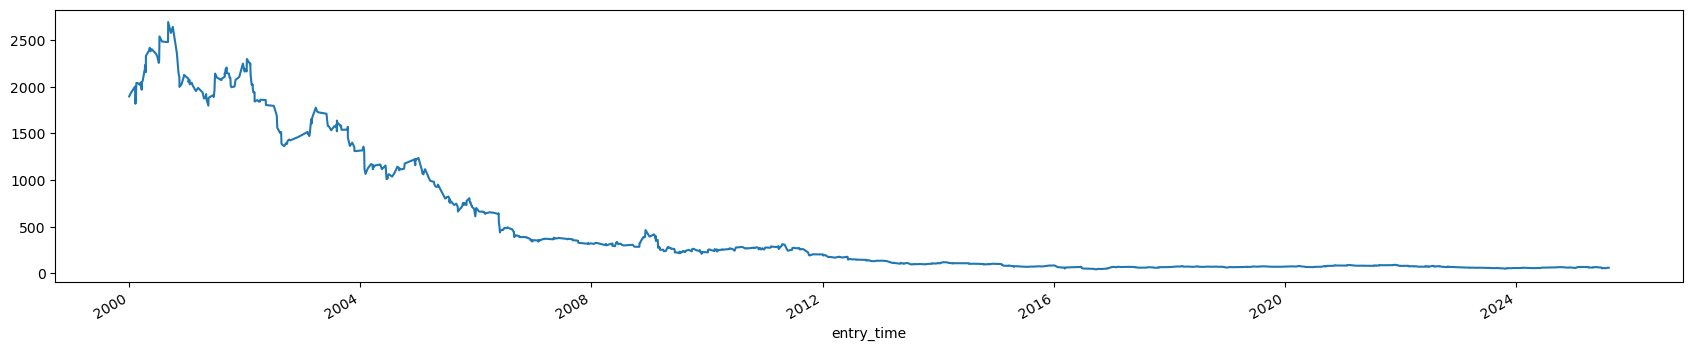

In [9]:
book.set_index('entry_time').Balance.plot(figsize=(21,4))